# Telecom Churn Prediction | Exploratory Data Analysis

## Import Relevant Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Initialize

In [2]:
pd.set_option('display.max_columns', None)

## Load the data

In [3]:
raw_df = pd.read_csv("../data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [4]:
df = raw_df.copy()

In [5]:
raw_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Shape of the data

In [6]:
df.shape

(7043, 21)

## Exploring data types

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Descriptive Statistics

In [36]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.00,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.35,89.85,118.75
TotalCharges,7043.0,2279.734304,2266.794470,0.00,398.55,1394.55,3786.60,8684.80


In [8]:
df.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,6531,2
top,3186-AJIEK,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,20.2,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


## Exploring Missing Values

In [9]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## Exploring Data Types

In [10]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

## Converting Invalid Labeled Data Type to Numeric 

In [11]:
df['TotalCharges'].dtypes

dtype('O')

In [12]:
invalid_values = df['TotalCharges'][pd.to_numeric(df['TotalCharges'], errors='coerce').isna()]

invalid_values.unique()

array([' '], dtype=object)

### Visualizing the Data with Invalid Values

In [13]:
df[pd.to_numeric(df['TotalCharges'], errors='coerce').isna()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


### Handling Invalid Types

In [14]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [15]:
df['TotalCharges'].isnull().sum()

np.int64(11)

In [16]:
df['TotalCharges'] = df['TotalCharges'].fillna(0)

In [17]:
df['TotalCharges'].isnull().sum()

np.int64(0)

In [18]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [19]:
df['SeniorCitizen'].value_counts()

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

The Senior Citizen column is labeled as integer. Upon verifying it is confirmed that it is a cateogircal value 

## Identifying Categorical Values and Numerical Values

In [20]:
categorical_cols = [col for col in df.columns if df[col].dtype == 'object']
categorical_cols

['customerID',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [21]:
categorical_cols.remove('customerID')
categorical_cols.remove('Churn')
categorical_cols.append('SeniorCitizen')

In [22]:
numeric_cols = [col for col in df.columns if col not in categorical_cols and col not in ('customerID', 'Churn')]
numeric_cols

['tenure', 'MonthlyCharges', 'TotalCharges']

## Exploring Categorical Features

#### Distribution of Categorical Features

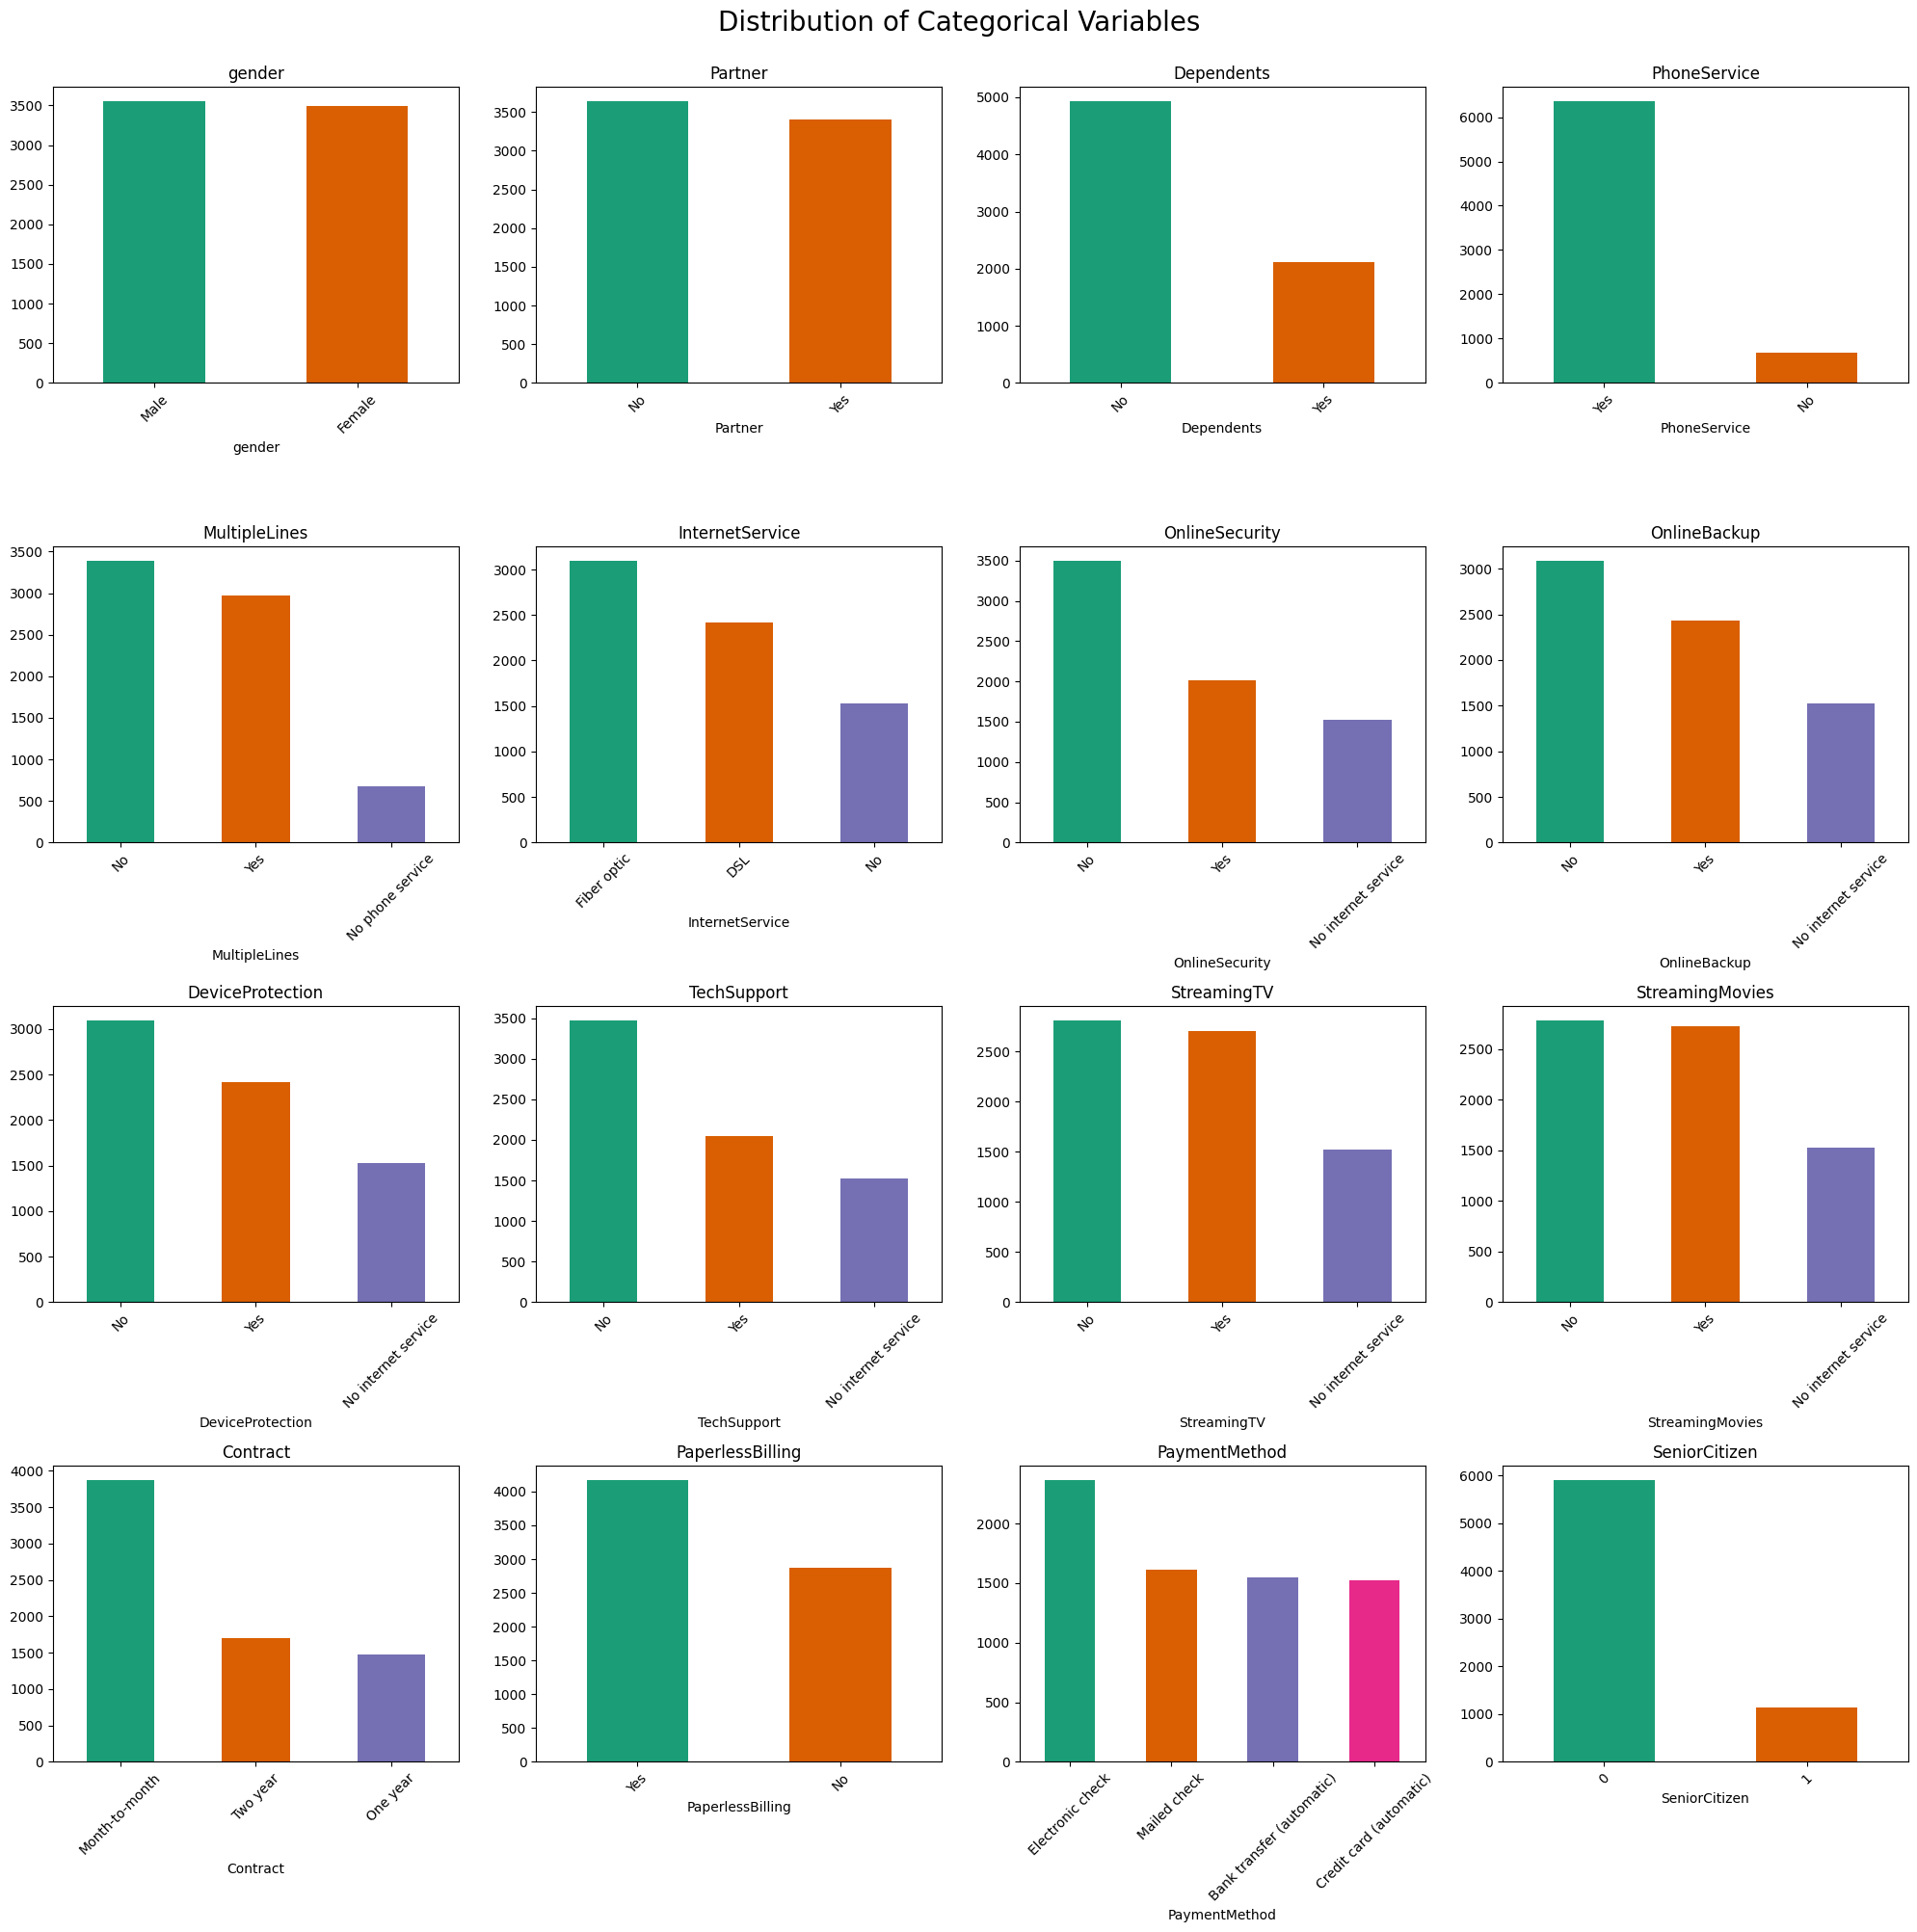

In [23]:
n_cols = 4
n_rows = (len(categorical_cols) - 1) // n_cols + 1

plt.figure(figsize=(20, 5 * n_rows))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(n_rows, n_cols, i)

    palette = sns.color_palette("Dark2", df[col].nunique())

    df[col].value_counts().plot(
        kind='bar',
        color=palette
    )

    plt.title(col)
    plt.xticks(rotation=45)

plt.suptitle("Distribution of Categorical Variables", fontsize=20, y=1.0)
plt.tight_layout()
plt.show()

In [38]:
df['gender'].value_counts()

gender
Male      3555
Female    3488
Name: count, dtype: int64

### Distribution of Categorical Featurues against Target

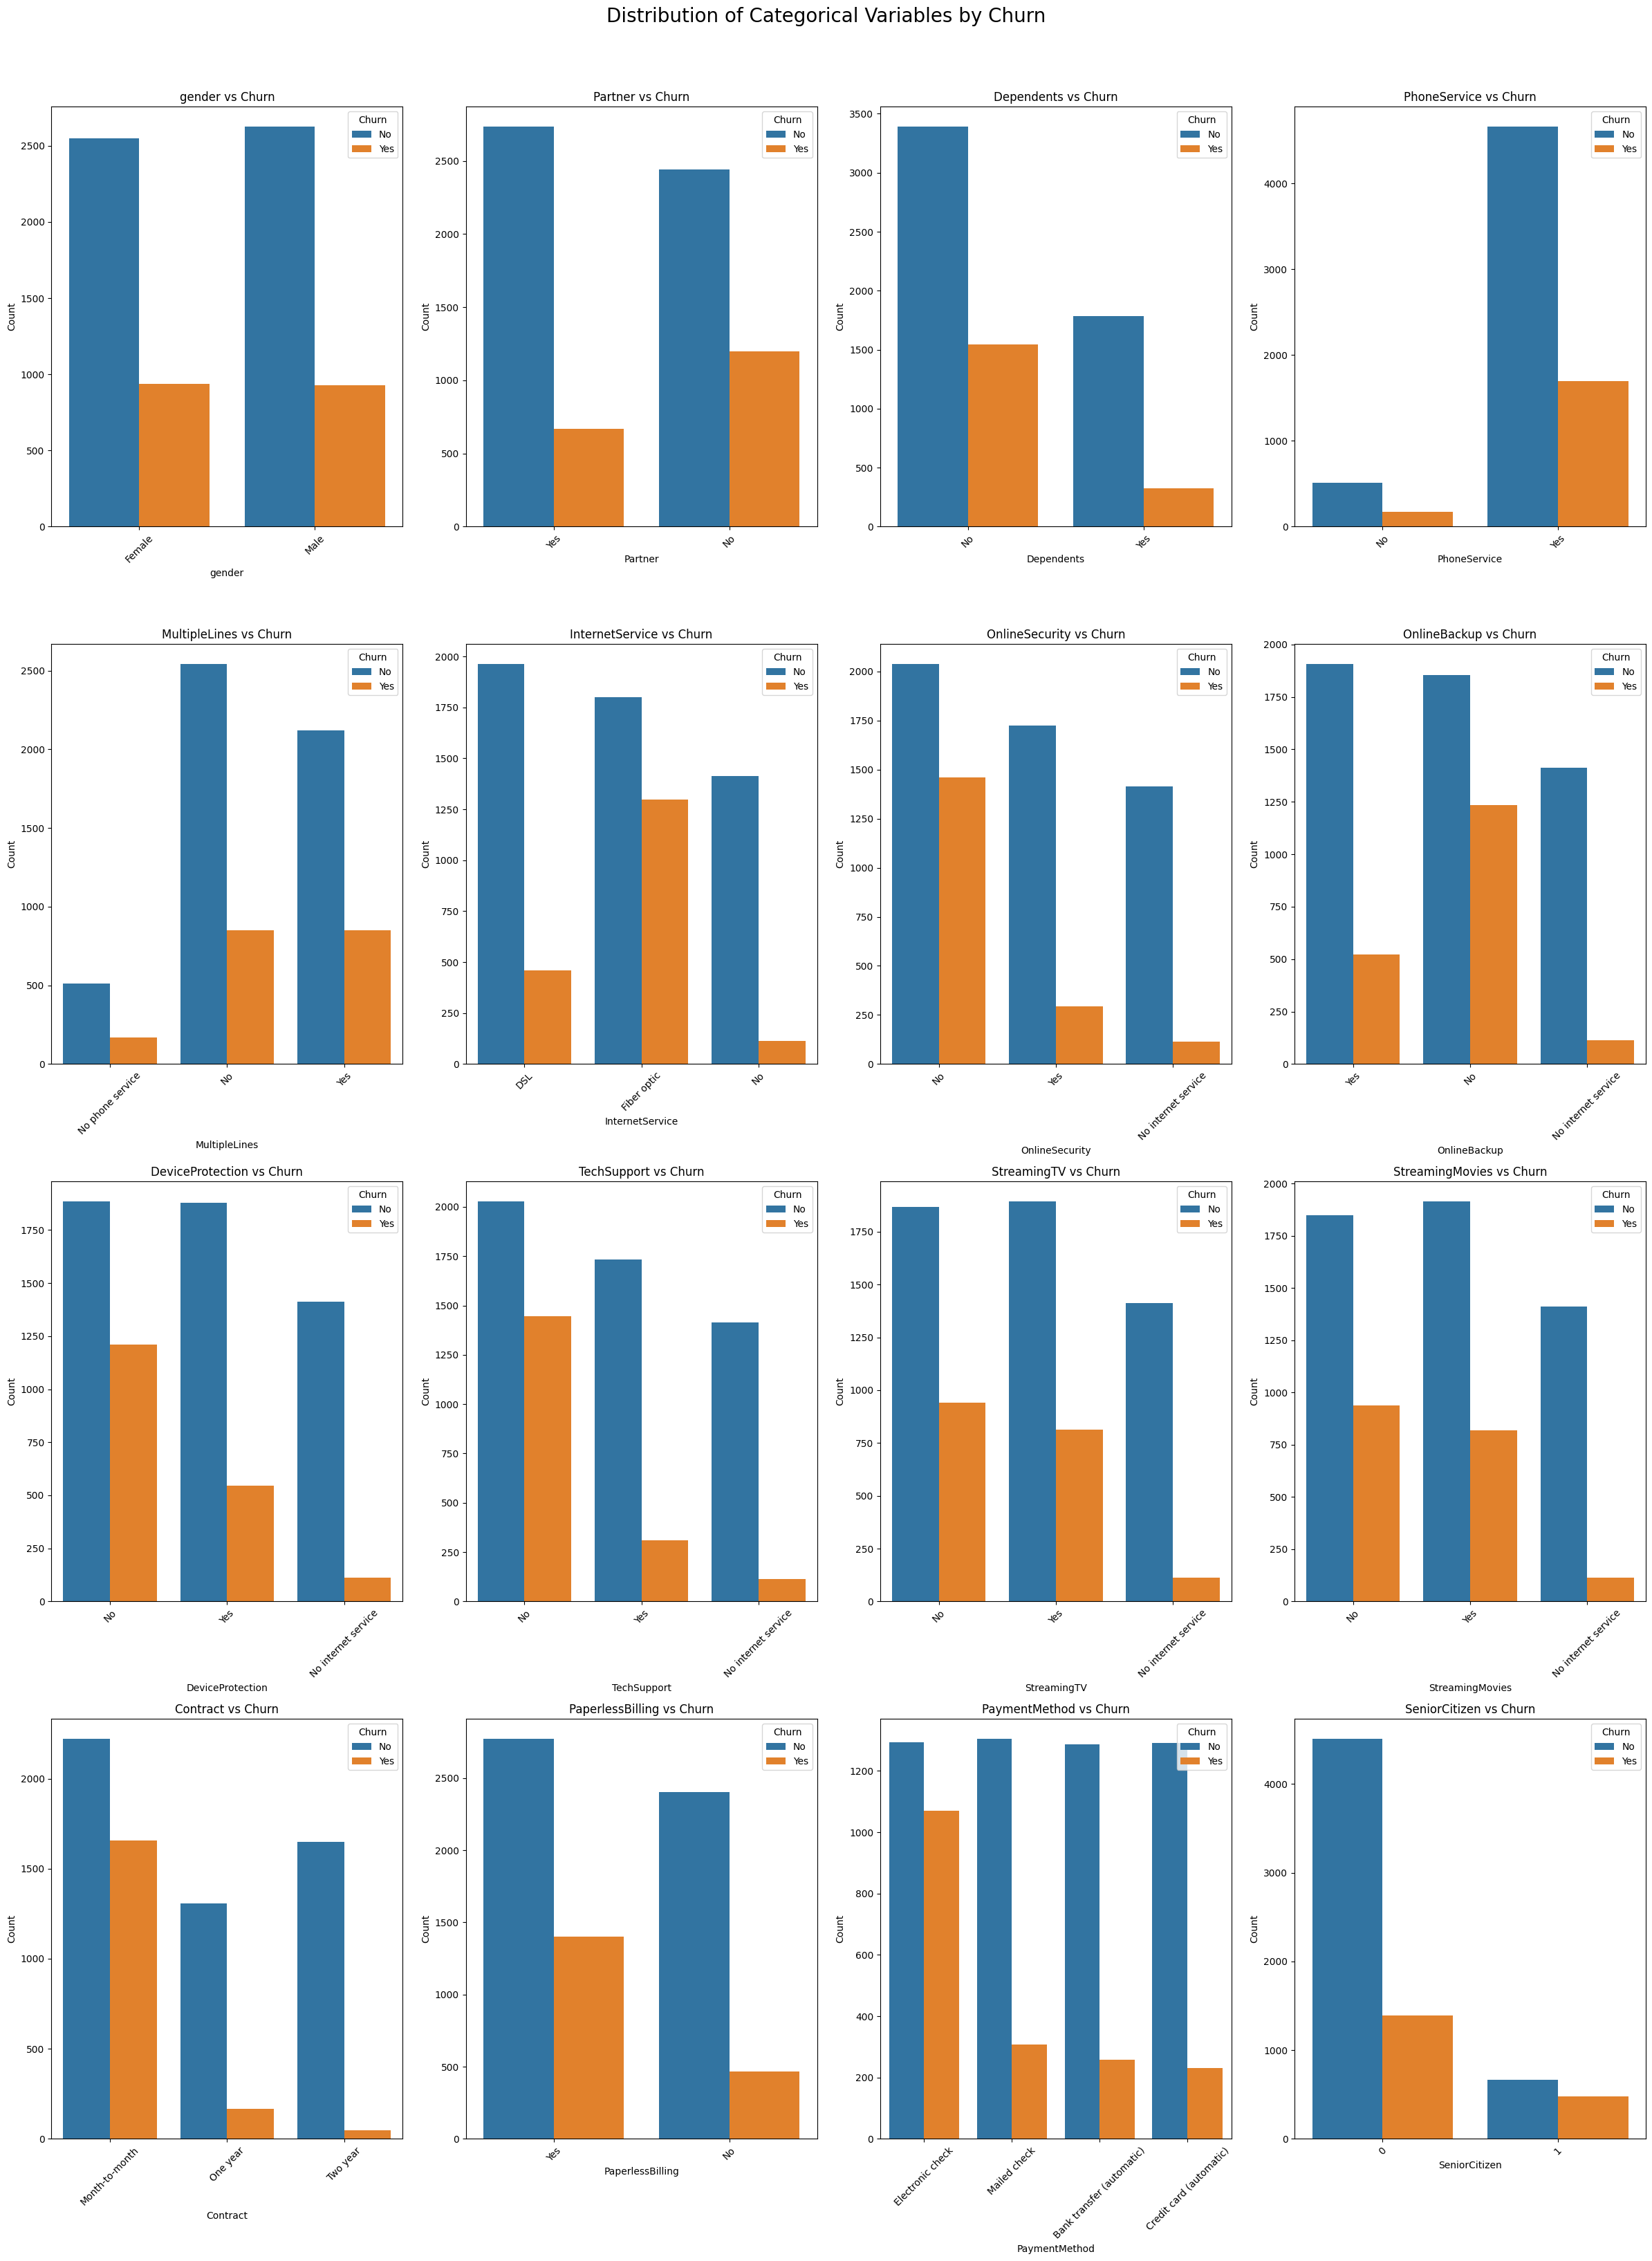

In [24]:
n_cols = 4
n_rows = (len(categorical_cols) - 1) // n_cols + 1

fig, axes = plt.subplots(n_rows, n_cols, figsize=(6*n_cols, 8*n_rows))
axes = axes.flatten()

for i, cols in enumerate(categorical_cols):
    sns.countplot(x=cols, hue='Churn', data=df, ax=axes[i])
    axes[i].set_title(f"{cols} vs Churn")
    axes[i].set_xlabel(cols)
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].legend(title='Churn', loc='upper right')

plt.suptitle("Distribution of Categorical Variables by Churn", fontsize=20, y=1.02)
plt.tight_layout()
plt.show()

### Proportion of Churn Across Categorical Features

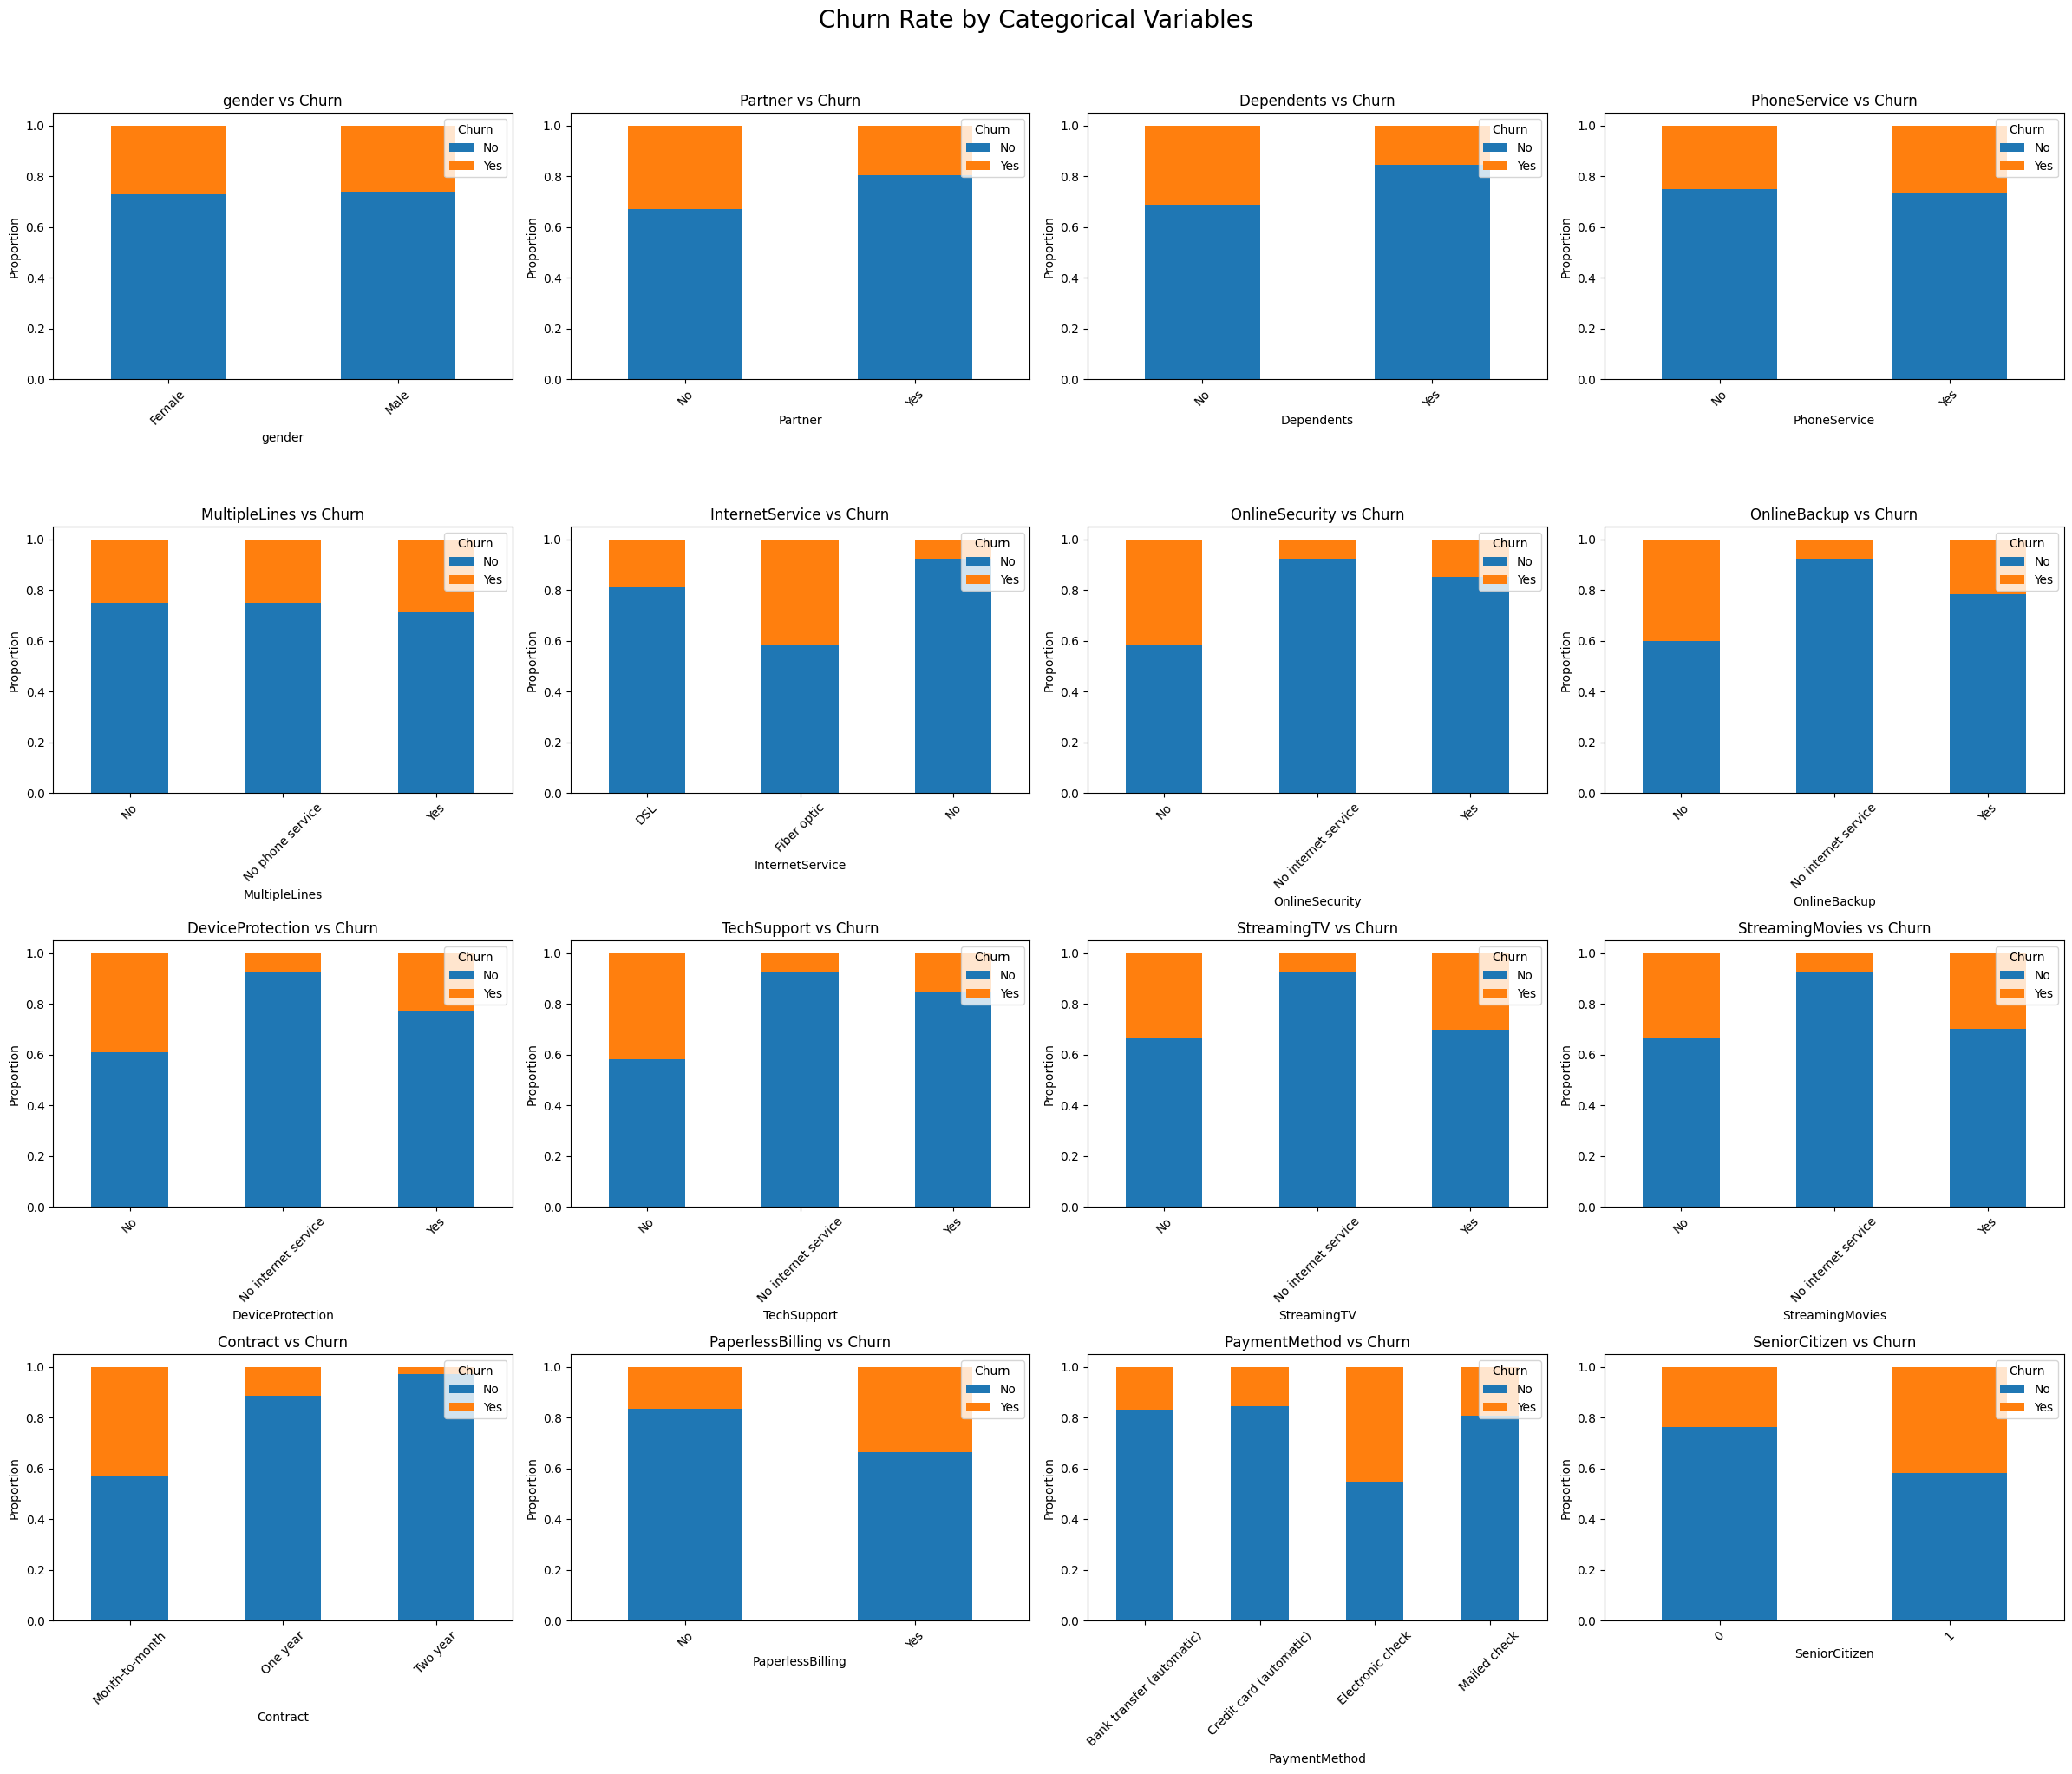

In [25]:
n_cols = 4
n_rows = (len(categorical_cols) - 1) // n_cols + 1

fig, axes = plt.subplots(n_rows, n_cols, figsize=(6*n_cols, 5*n_rows))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    churn_rate = df.groupby(col)['Churn'].value_counts(normalize=True).unstack()
    
    churn_rate.plot(kind='bar', stacked=True, ax=axes[i], color=['#1f77b4', '#ff7f0e'])
    
    axes[i].set_title(f"{col} vs Churn")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Proportion")
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].legend(title='Churn', loc='upper right')

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Churn Rate by Categorical Variables", fontsize=20, y=1.02)
plt.tight_layout()
plt.show()

## Exploring Numerical Features

### Distribution of Numeric Featuers

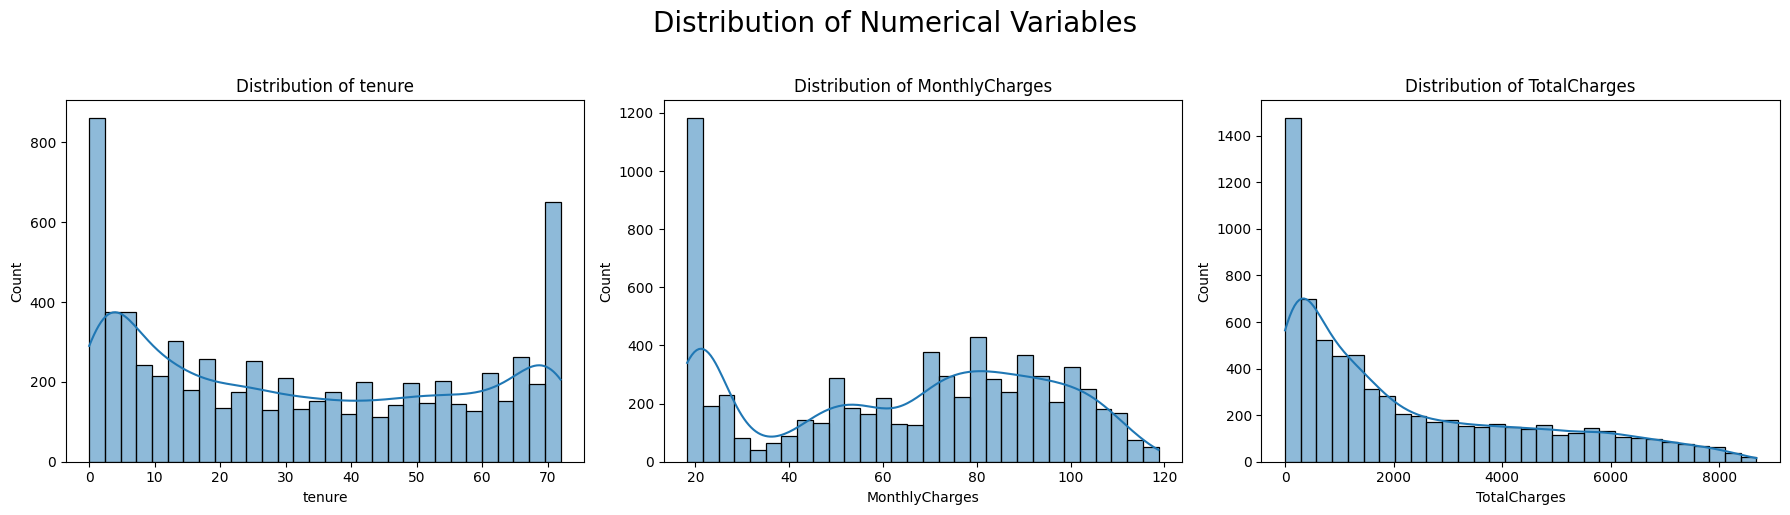

In [26]:
n_cols = 3 
n_rows = (len(numeric_cols) - 1) // n_cols + 1

fig, axes = plt.subplots(n_rows, n_cols, figsize=(6*n_cols, 5*n_rows))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.histplot(df[col], kde=True, bins=30, ax=axes[i], color='#1f77b4')
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Distribution of Numerical Variables", fontsize=20, y=1.02)
plt.tight_layout()
plt.show()

### Distribution of Numeric Features against Target

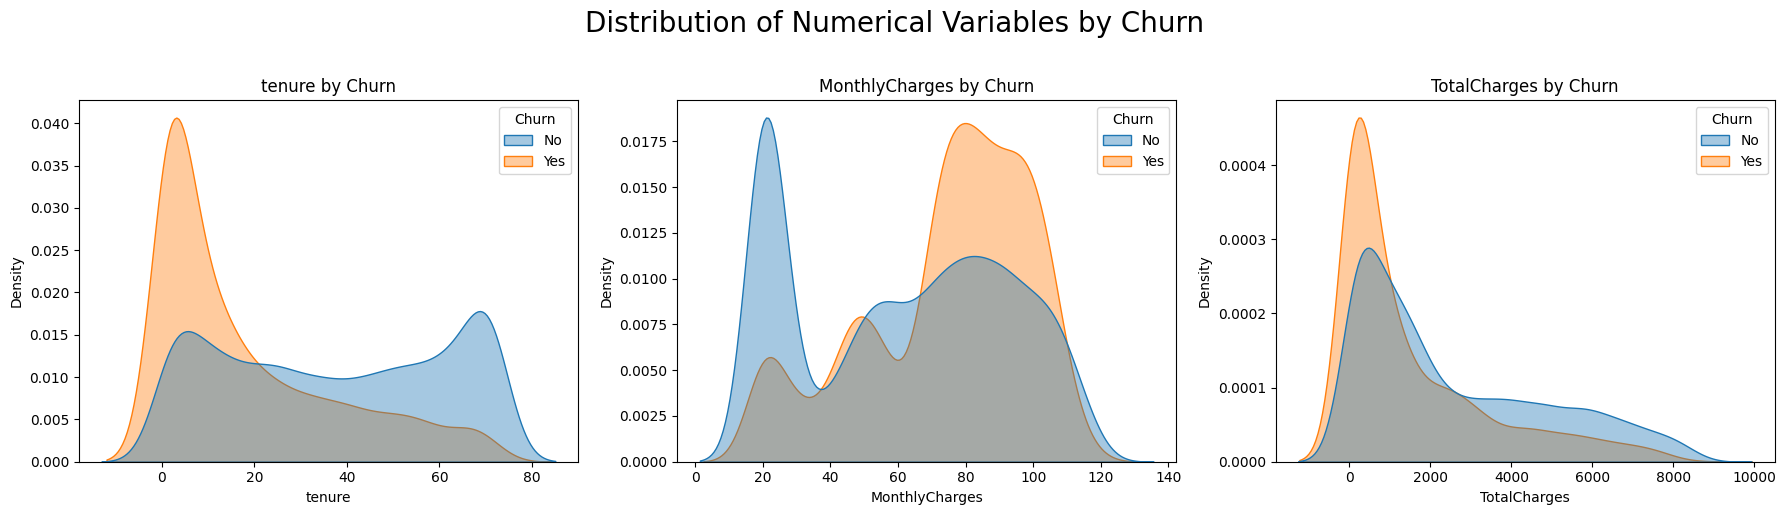

In [34]:
n_cols = 3
n_rows = (len(numeric_cols) - 1) // n_cols + 1

fig, axes = plt.subplots(n_rows, n_cols, figsize=(6*n_cols, 5*n_rows))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.kdeplot(
        data=df,
        x=col,
        hue="Churn",
        fill=True,
        common_norm=False,
        alpha=0.4,
        ax=axes[i]
    )
    axes[i].set_title(f"{col} by Churn")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Density")

# Remove unused axes
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Distribution of Numerical Variables by Churn", fontsize=20, y=1.02)
plt.tight_layout()
plt.show()

### Boxplots of Numerical Features

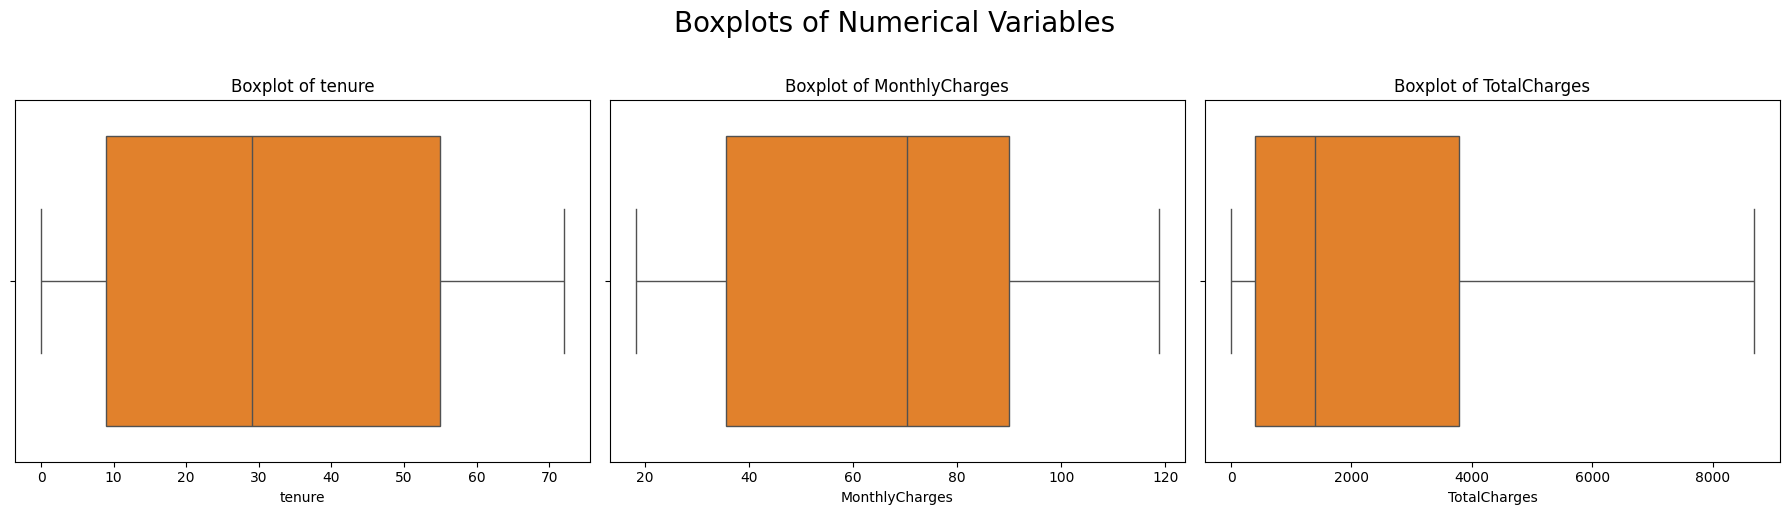

In [27]:
fig, axes = plt.subplots(n_rows, n_cols, figsize=(6*n_cols, 5*n_rows))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.boxplot(x=df[col], ax=axes[i], color='#ff7f0e')
    axes[i].set_title(f"Boxplot of {col}")

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Boxplots of Numerical Variables", fontsize=20, y=1.02)
plt.tight_layout()
plt.show()

### Pairwise Relationships for Multivariate Insights

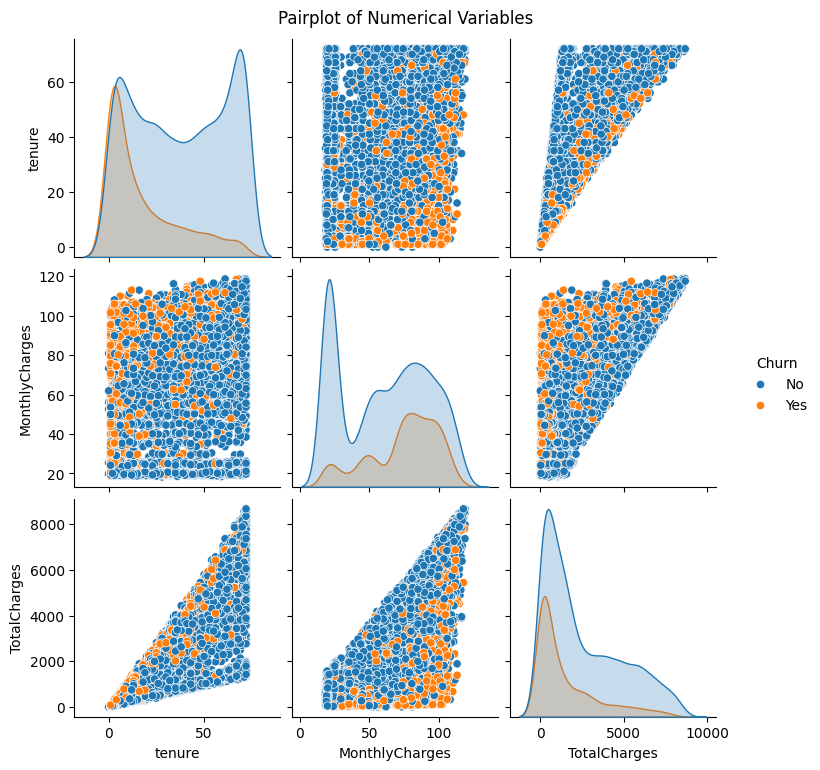

In [28]:
sns.pairplot(df[numeric_cols + ['Churn']], hue='Churn')
plt.suptitle("Pairplot of Numerical Variables", y=1.02)
plt.show()

### Exploring Correlations of Numeric Features

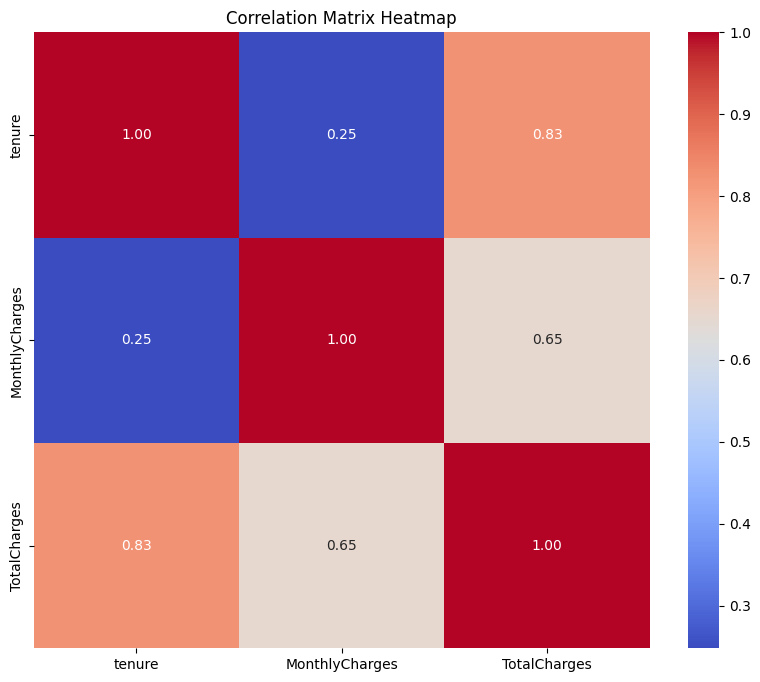

In [29]:
corr = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

## Exploring the Impact of Categorical Features on Numerical Variables

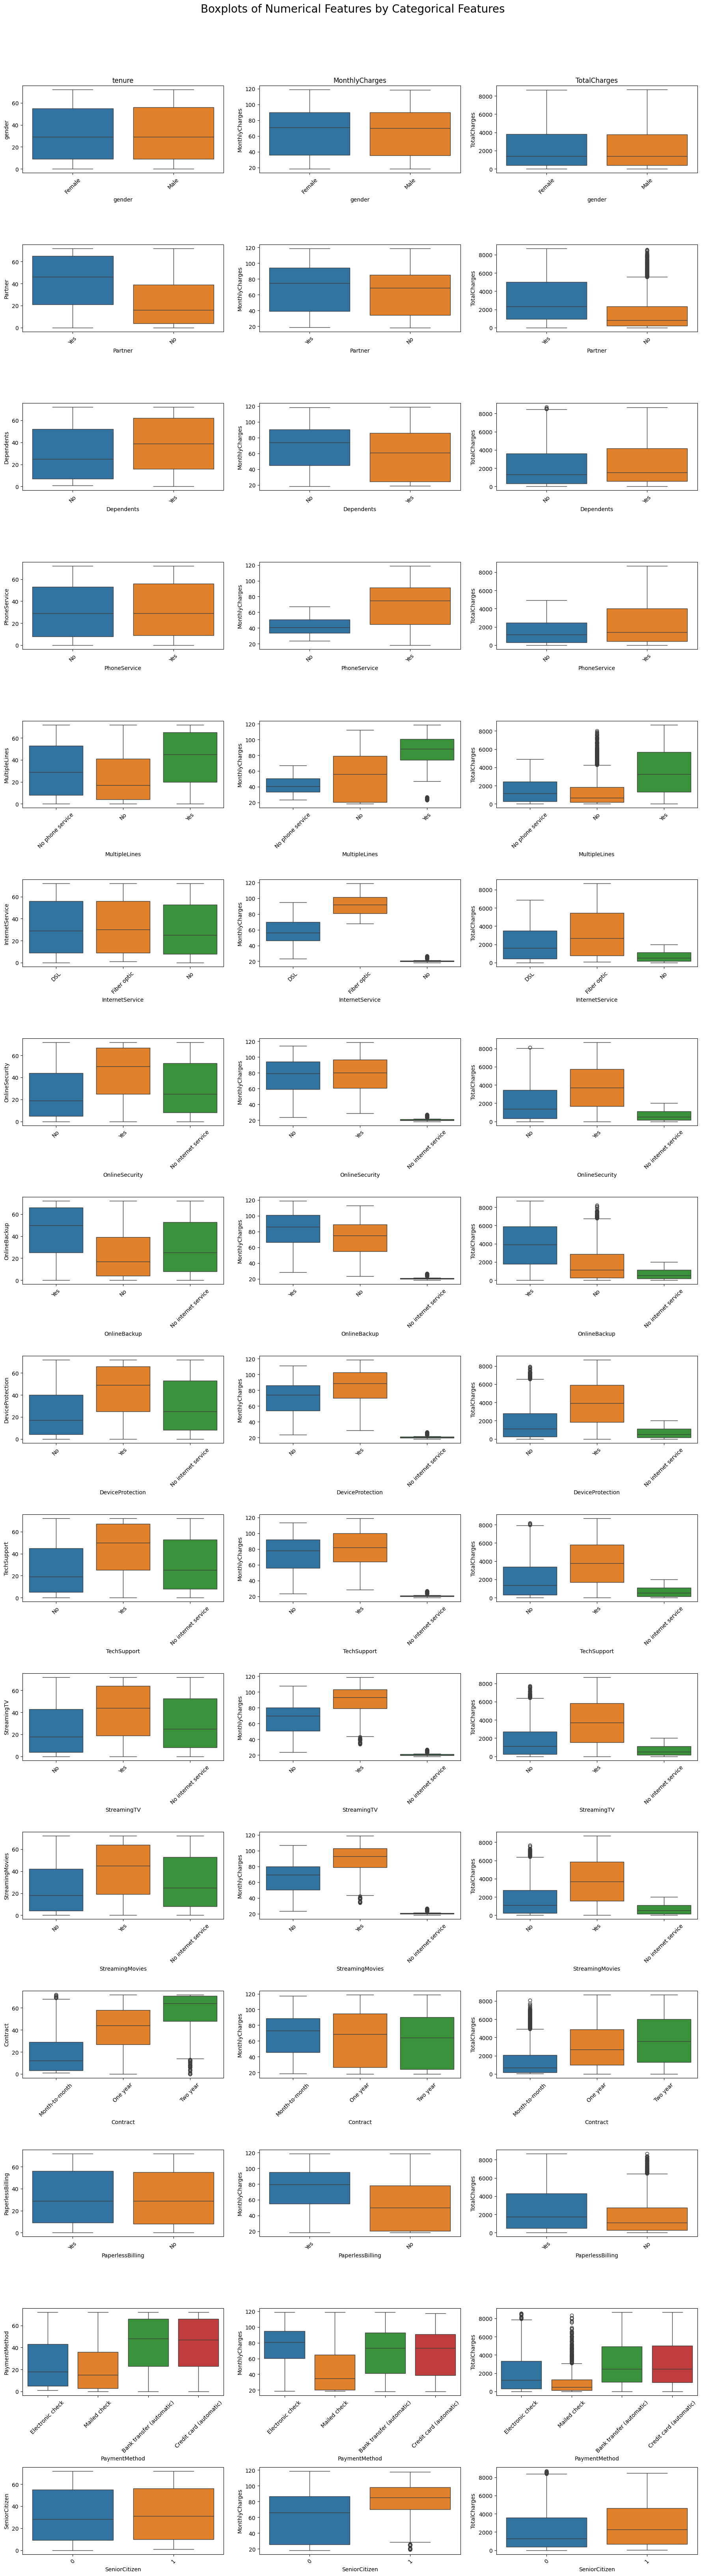

In [30]:
n_rows = len(categorical_cols)
n_cols = len(numeric_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(6*n_cols, 4*n_rows), squeeze=False)

for i, cat in enumerate(categorical_cols):
    for j, num in enumerate(numeric_cols):
        sns.boxplot(x=cat, y=num, data=df, ax=axes[i, j], hue=cat, legend=False)
        axes[i, j].tick_params(axis='x', rotation=45)
        if i == 0:
            axes[i, j].set_title(num)
        if j == 0:
            axes[i, j].set_ylabel(cat)

plt.suptitle("Boxplots of Numerical Features by Categorical Features", fontsize=20, y=1.02)
plt.tight_layout()
plt.show()

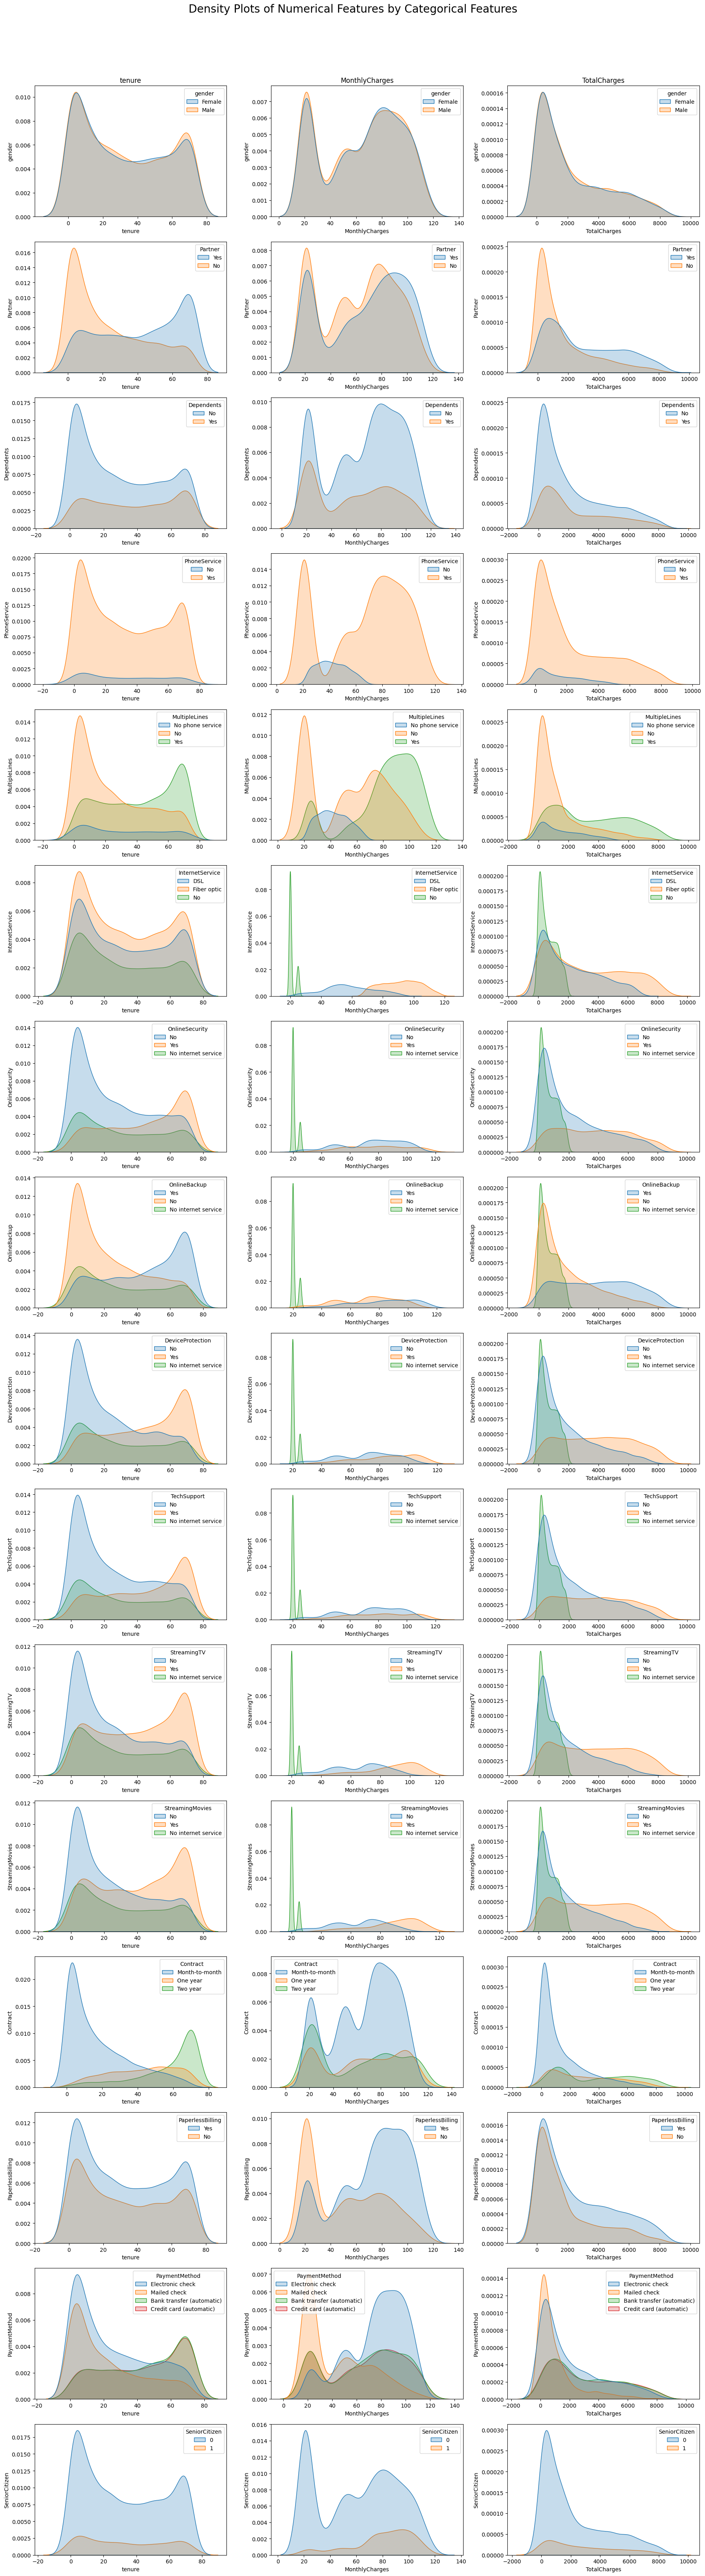

In [31]:
n_rows = len(categorical_cols)
n_cols = len(numeric_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(6*n_cols, 4*n_rows), squeeze=False)

for i, cat in enumerate(categorical_cols):
    for j, num in enumerate(numeric_cols):
        sns.kdeplot(data=df, x=num, hue=cat, ax=axes[i, j], fill=True)
        axes[i, j].set_xlabel(num)
        axes[i, j].set_ylabel(cat)
        if i == 0:
            axes[i, j].set_title(num)

plt.suptitle("Density Plots of Numerical Features by Categorical Features", fontsize=20, y=1.02)
plt.tight_layout()
plt.show()

## Detecting Outliers

In [32]:
summary = [] 

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outlier_mask = (df[col] < lower_bound) | (df[col] > upper_bound)
    outlier_count = outlier_mask.sum()
    outlier_percentage = round(100 * outlier_mask.mean(), 2)

    summary.append([col, lower_bound, upper_bound, outlier_count, outlier_percentage])

outlier_summary = pd.DataFrame(summary, columns=['Feature', 'Lower Bound', 'Upper Bound', 'Outlier Count', 'Outlier Percentage'])
outlier_summary

,Feature,Lower Bound,Upper Bound,Outlier Count,Outlier Percentage
0,tenure,-60.000,124.000,0,0.0
1,MonthlyCharges,-46.025,171.375,0,0.0
2,TotalCharges,-4683.525,8868.675,0,0.0


## Exploring target variables

In [33]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

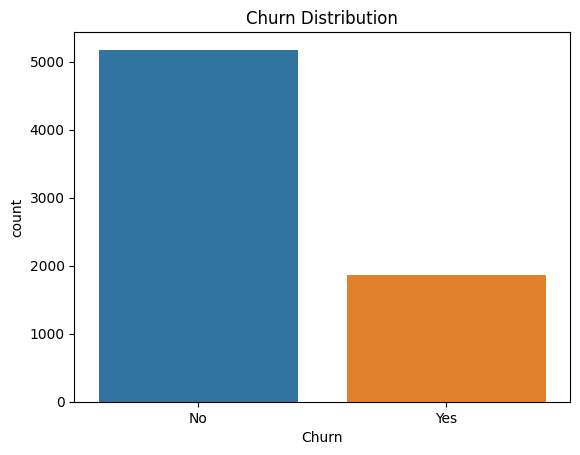

In [43]:
sns.countplot(x='Churn', data=df, hue='Churn', legend=False)
plt.title("Churn Distribution")
plt.show()

## Summary of Findings

The exploratory analysis of the Telco Customer Churn dataset revealed several important patterns and relationships:

- **Data Quality & Structure**
  - The dataset contains 7043 customers with 21 features, mostly categorical.  
  - No missing values were found after cleaning, though 11 invalid entries in `TotalCharges` were corrected.  
  - Outlier analysis confirmed that numerical features (`tenure`, `MonthlyCharges`, `TotalCharges`) are well-behaved, with no extreme values outside IQR bounds.

- **Target Distribution**
  - Churn is moderately imbalanced: **73.5% of customers stayed** while **26.5% churned**.  
  - This imbalance should be considered during modeling to avoid bias toward the majority class.

- **Categorical Insights**
  - **Contract type** is the strongest churn driver: month-to-month customers churn far more than one- or two-year contract holders.  
  - **Payment method** matters: customers paying via electronic check churn disproportionately, while automatic payments (bank transfer/credit card) are linked to retention.  
  - **Internet service** type influences churn: fiber optic customers churn more than DSL users.  
  - Add-on services like **OnlineSecurity** and **TechSupport** are associated with lower churn, suggesting these features improve customer stickiness.  
  - **Senior citizens** churn more often than non-seniors, while customers with partners or dependents tend to stay longer.

- **Numerical Insights**
  - **Tenure** is a critical predictor: churned customers typically have short tenure, while long-tenured customers are highly loyal.  
  - **MonthlyCharges**: churned customers are concentrated in the higher charge range (70–90), while retained customers are more evenly spread.  
  - **TotalCharges**: churned customers accumulate lower total charges, reflecting short tenure and limited engagement. Retained customers show higher lifetime value.

- **Relationships Between Variables**
  - Strong positive correlation between **tenure and TotalCharges** (0.83).  
  - Moderate positive correlation between **MonthlyCharges and TotalCharges** (0.65).  
  - Weak positive correlation between **MonthlyCharges and tenure** (0.25).  
  - Pairplots confirm that churned customers cluster in the **low-tenure, high-monthly-charge, low-total-charge** region.

---

### Key Takeaways
- Churn is driven by **short tenure, high monthly charges, month-to-month contracts, electronic check payments, fiber optic internet, and lack of support/security services**.  
- Retained customers are characterized by **long tenure, higher total charges, longer contracts, automatic payments, and bundled services**.  
- These findings highlight clear opportunities for churn reduction: encourage longer contracts, promote automatic payments, and bundle support/security services to improve retention.